In [1]:
import numpy  as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from dataclasses import dataclass
from pathlib import Path
from tqdm    import tqdm
from typing  import Iterable
import random

import yaml

In [2]:
# HATCH
# STAT_DIRECTORY = Path('/home/aroefer/icra_bopt_exp_sd/')
# STAT_PATTERN   = 'is_sd_p5_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_sliding_door.csv')
# OUT_PREFIX     = 'bopt_hatch'
# METHOD_NAME    = 'bopt'

# DOOR
# STAT_DIRECTORY = Path('/home/aroefer/icra_bopt_exp_door/')
# STAT_PATTERN   = 'is_door_p5_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_door.csv')
# OUT_PREFIX     = 'bopt_door'
# METHOD_NAME    = 'bopt'

# SACGMM - DOOR
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_door/')
# STAT_PATTERN   = 'is_door_p5_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_door.csv')
# OUT_PREFIX     = 'sacgmm_door'
# METHOD_NAME    = 'sacgmm'

# SACGMM - HATCH
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_sd/')
# STAT_PATTERN   = 'is_sd_p5_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_sliding_door.csv')
# OUT_PREFIX     = 'sacgmm_hatch'
# METHOD_NAME    = 'sacgmm'

# SACGMM RPB - DOOR
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_door/')
# STAT_PATTERN   = 'is_door_rpb_p5_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_door.csv')
# OUT_PREFIX     = 'sacgmm_rpb_door'
# METHOD_NAME    = 'sacgmm'

# SACGMM RPB - HATCH
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_sd/')
# STAT_PATTERN   = 'is_sd_rpb_p5_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_sliding_door.csv')
# OUT_PREFIX     = 'sacgmm_rpb_hatch'
# METHOD_NAME    = 'sacgmm'

# SACGMM RPB GL70 - DOOR
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_door/')
# STAT_PATTERN   = 'is_door_rpb_gl70_p5_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_door.csv')
# OUT_PREFIX     = 'sacgmm_rpb_door_gl70'
# METHOD_NAME    = 'sacgmm'

# SACGMM RPB GL70 - HATCH
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_sd/')
# STAT_PATTERN   = 'is_sd_rpb_gl70_p5_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_sliding_door.csv')
# OUT_PREFIX     = 'sacgmm_rpb_hatch_gl70'
# METHOD_NAME    = 'sacgmm'

# SACGMM RESNET - DOOR
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_door/')
# STAT_PATTERN   = 'is_door_p5_*v_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_door.csv')
# OUT_PREFIX     = 'sacgmm_door_r18'
# METHOD_NAME    = 'sacgmm'

# SACGMM RESNET - HATCH
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_sd/')
# STAT_PATTERN   = 'is_sd_p5_v_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_sliding_door.csv')
# OUT_PREFIX     = 'sacgmm_hatch_r18'
# METHOD_NAME    = 'sacgmm'

# SACGMM RG GL120 RESNET - DOOR
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_door/')
# STAT_PATTERN   = 'is_door_rg_gl120_p5_*_v_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_door.csv')
# OUT_PREFIX     = 'sacgmm_rg_door_gl120_v'
# METHOD_NAME    = 'sacgmm'

# SACGMM RG GL120 RESNET - HATCH
STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_sd/')
STAT_PATTERN   = 'is_sd_rg_gl120_p5_*_v_*'
DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_sliding_door.csv')
OUT_PREFIX     = 'sacgmm_rg_hatch_gl120_v'
METHOD_NAME    = 'sacgmm'

# SACGMM RPB GL120 RESNET - DOOR
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_door/')
# STAT_PATTERN   = 'is_door_rpb_gl120_p5_*_v_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_door.csv')
# OUT_PREFIX     = 'sacgmm_rbp_door_gl120_v'
# METHOD_NAME    = 'sacgmm'

# SACGMM RPB GL120 RESNET - HATCH
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_sd/')
# STAT_PATTERN   = 'is_sd_rpb_gl120_p5_*_v_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_sliding_door.csv')
# OUT_PREFIX     = 'sacgmm_rpb_hatch_gl120_v'
# METHOD_NAME    = 'sacgmm'

# SACGMM RPB GL70 RESNET - DOOR
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_door/')
# STAT_PATTERN   = 'is_door_rpb_gl70_p5_*_v_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_door.csv')
# OUT_PREFIX     = 'sacgmm_rpb_door_gl70_v'
# METHOD_NAME    = 'sacgmm'

# SACGMM RPB GL70 RESNET - HATCH
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_sd/')
# STAT_PATTERN   = 'is_sd_rpb_gl70_p5_*_v_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_sliding_door.csv')
# OUT_PREFIX     = 'sacgmm_rpb_hatch_gl70_v'
# METHOD_NAME    = 'sacgmm'



In [35]:
# HATCH
# STAT_DIRECTORY = Path('/home/aroefer/icra_bopt_exp_sd/')
# STAT_PATTERN   = 'is_sd_p5_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_sliding_door.csv')
# OUT_PREFIX     = 'bopt_hatch'
# METHOD_NAME    = 'bopt'

# DOOR
# STAT_DIRECTORY = Path('/home/aroefer/icra_bopt_exp_door/')
# STAT_PATTERN   = 'is_door_p5_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_door.csv')
# OUT_PREFIX     = 'bopt_door'
# METHOD_NAME    = 'bopt'

# REAL DOOR
# STAT_DIRECTORY = Path('/home/aroefer/bopt_gmm_exp_rdoor_final/')
# STAT_PATTERN   = 'is_rdoor_p3_hpo_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_real_door.csv')
# OUT_PREFIX     = 'bopt_rdoor'
# METHOD_NAME    = 'bopt'

# SACGMM - DOOR
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_door/')
# STAT_PATTERN   = 'is_door_p5_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_door.csv')
# OUT_PREFIX     = 'sacgmm_door'
# METHOD_NAME    = 'sacgmm'

# SACGMM - HATCH
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_sd/')
# STAT_PATTERN   = 'is_sd_p5_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_sliding_door.csv')
# OUT_PREFIX     = 'sacgmm_hatch'
# METHOD_NAME    = 'sacgmm'

# SACGMM RPB - DOOR
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_door/')
# STAT_PATTERN   = 'is_door_rpb_p5_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_door.csv')
# OUT_PREFIX     = 'sacgmm_rpb_door'
# METHOD_NAME    = 'sacgmm'

# SACGMM RPB - HATCH
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_sd/')
# STAT_PATTERN   = 'is_sd_rpb_p5_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_sliding_door.csv')
# OUT_PREFIX     = 'sacgmm_rpb_hatch'
# METHOD_NAME    = 'sacgmm'

# SACGMM RPB GL70 - DOOR
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_door/')
# STAT_PATTERN   = 'is_door_rpb_gl70_p5_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_door.csv')
# OUT_PREFIX     = 'sacgmm_rpb_door_gl70'
# METHOD_NAME    = 'sacgmm'

# SACGMM RPB GL70 - HATCH
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_sd/')
# STAT_PATTERN   = 'is_sd_rpb_gl70_p5_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_sliding_door.csv')
# OUT_PREFIX     = 'sacgmm_rpb_hatch_gl70'
# METHOD_NAME    = 'sacgmm'

# SACGMM RESNET - DOOR
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_door/')
# STAT_PATTERN   = 'is_door_p5_*v_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_door.csv')
# OUT_PREFIX     = 'sacgmm_door_r18'
# METHOD_NAME    = 'sacgmm'

# SACGMM RESNET - REAL DOOR
STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_rdoor_final/')
STAT_PATTERN   = 'is_rdoor_p3_hpo*'
DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_real_door.csv')
OUT_PREFIX     = 'sacgmm_rdoor_r18'
METHOD_NAME    = 'sacgmm'

# SACGMM RESNET - HATCH
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_sd/')
# STAT_PATTERN   = 'is_sd_p5_v_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_sliding_door.csv')
# OUT_PREFIX     = 'sacgmm_hatch_r18'
# METHOD_NAME    = 'sacgmm'

# SACGMM RG GL120 RESNET - DOOR
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_door/')
# STAT_PATTERN   = 'is_door_rg_gl120_p5_*_v_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_door.csv')
# OUT_PREFIX     = 'sacgmm_rg_door_gl120_v'
# METHOD_NAME    = 'sacgmm'

# SACGMM RG GL120 RESNET - HATCH
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_sd/')
# STAT_PATTERN   = 'is_sd_rg_gl120_p5_*_v_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_sliding_door.csv')
# OUT_PREFIX     = 'sacgmm_rg_hatch_gl120_v'
# METHOD_NAME    = 'sacgmm'

# SACGMM RPB GL120 RESNET - DOOR
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_door/')
# STAT_PATTERN   = 'is_door_rpb_gl120_p5_*_v_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_door.csv')
# OUT_PREFIX     = 'sacgmm_rbp_door_gl120_v'
# METHOD_NAME    = 'sacgmm'

# SACGMM RPB GL120 RESNET - HATCH
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_sd/')
# STAT_PATTERN   = 'is_sd_rpb_gl120_p5_*_v_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_sliding_door.csv')
# OUT_PREFIX     = 'sacgmm_rpb_hatch_gl120_v'
# METHOD_NAME    = 'sacgmm'

# SACGMM RPB GL70 RESNET - DOOR
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_door/')
# STAT_PATTERN   = 'is_door_rpb_gl70_p5_*_v_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_door.csv')
# OUT_PREFIX     = 'sacgmm_rpb_door_gl70_v'
# METHOD_NAME    = 'sacgmm'

# SACGMM RPB GL70 RESNET - HATCH
# STAT_DIRECTORY = Path('/home/aroefer/icra_sacgmm_exp_sd/')
# STAT_PATTERN   = 'is_sd_rpb_gl70_p5_*_v_*'
# DF_BASELINES   = pd.read_csv('/home/aroefer/rl_ws/src/bopt_gmm/data/baselines_sliding_door.csv')
# OUT_PREFIX     = 'sacgmm_rpb_hatch_gl70_v'
# METHOD_NAME    = 'sacgmm'



In [36]:
def baseline_gmm_performance(cfg_rpb, gmm_performance):
    if cfg_rpb['load_path'] is None:
        return gmm_performance
    
    if cfg_rpb['selection_strategy'] == 'steps':
        return gmm_performance

    if cfg_rpb['selection_strategy'] == 'episodes':
        return gmm_performance

    rp_path = Path(cfg_rpb['load_path'])

    df_inc  = pd.read_csv(rp_path.parent / 'bopt_incumbents.csv')
    if cfg_rpb['selection_strategy'] in {'incumbent_num', 'incumbent_gmm_num'}:
        idx_inc = min(len(df_inc.episodes), cfg_rpb['incumbent_to_pick']) - 1
    elif cfg_rpb['selection_strategy'] in {'incumbent_limit', 'incumbent_gmm_limit'}:
        idx_inc = df_inc.episodes[df_inc.episodes <= cfg_rpb['episode_count']].index[-1]
    else:
        raise RuntimeError(f'Unknown replay buffer strategy "{cfg_rpb["selection_strategy"]}"')

    return df_inc.accuracy[idx_inc]

In [37]:
@dataclass
class AccuracyStat:
    dir_prefix  : str
    data_points : dict
    components  : int   = 3
    prior       : float = 0.0
    mean        : float = 0.0
    covar       : float = 0.0
    noise       : float = None
    means       : list  = None
    cvars       : list  = None
    cvar_type   : str   = None
    baseline    : float = 0.0
    baseline_2  : float = 0.0
    last_optimization : set = None
    num_incumbents : dict = None

def collect_ic_data(files : Iterable[Path], base_lines : dict, base_value=0.0):
    data_points = {}

    perf_base = base_value
    perf_base_2 = None
    noise = None
    components = None
    opt_episode_step = {}

    # Figure out the number of samples
    samples = set(int(f.parent.name.split('_')[-2]) for f in files)
    sample_idx = dict(zip(samples, range(len(samples))))
    directory_prefix = '_'.join(files[0].parent.name.split('_')[:-2])

    final_perf = {}

    incumbent_count = {}

    # Collect base array
    for f in files:
        sample = int(f.parent.name.split('_')[-2])
        s_idx  = sample_idx[sample]
        if noise is None:
            components = int([p[-1] for p in f.parent.name.split('_') if len(p) == 2 and p[0] == 'p'][0])

            try:
                df_ic = pd.read_csv(f.parent / f'{METHOD_NAME}_initial_conditions.csv')
                opt_substeps = {bs: df_ic[df_ic.bopt_step == bs].substep.max() for bs in df_ic.bopt_step.unique()}
                epsiode_counter = 0
                for bs, ss in sorted(opt_substeps.items()):
                    opt_episode_step[bs] = epsiode_counter
                    epsiode_counter += ss
            except pd.errors.EmptyDataError:
                if METHOD_NAME != 'sacgmm':
                    raise Exception(f'CSV "{f.parent / f"{METHOD_NAME}_initial_conditions.csv"}" seems to be empty.')

            with open(f.parent / 'config.yaml') as cf:
                config = yaml.safe_load(cf)
            model = config['bopt_agent']['gmm']['model']

            noise = config['env']['noise']['position']['variance'] if 'noise' in config['env'] else 0.0
            if model in base_lines:
                perf_base = base_lines[model][noise]

                if METHOD_NAME == 'sacgmm':
                    cfg_rpb = config['sacgmm']['replay_buffer']

                    perf_base_2 = baseline_gmm_performance(cfg_rpb, perf_base)

        try:
            df  = pd.read_csv(f)
        except pd.errors.EmptyDataError:
            continue
        idx = int(f.name.split('_')[-2])
        if idx not in data_points:
            data_points[idx] = [None] * len(samples)
        
        if idx not in incumbent_count:
            incumbent_count[idx] = 0
        
        incumbent_count[idx] += 1

        if sample not in final_perf:
            final_perf[sample] = 0 

        final_perf[sample] = max(final_perf[sample], idx)

        data_points[idx][s_idx] = df.success.mean()
    
    sorted_keys = sorted(data_points.keys())
    for x in range(len(sorted_keys)):
        if x == 0:
            data_points[sorted_keys[x]] = [v if v is not None else perf_base for v in data_points[sorted_keys[x]]]
        else:
            data_points[sorted_keys[x]] = [v if v is not None else data_points[sorted_keys[x-1]][y] for y, v in enumerate(data_points[sorted_keys[x]])]

    if METHOD_NAME == 'sacgmm':
        opt_episode_step = dict(zip(sorted_keys, sorted_keys))

    incumbent_count = {opt_episode_step[k]: v for k, v in incumbent_count.items()}

    data_points = {opt_episode_step[k]: v for k, v in data_points.items()}

    final_perf = {opt_episode_step[v] for v in final_perf.values()}

    return AccuracyStat(directory_prefix,
                        data_points,
                        components,
                        config['bopt_agent']['prior_range'] if 'prior_range' in config['bopt_agent'] else 0.0,
                        config['bopt_agent']['mean_range'] if 'mean_range' in config['bopt_agent'] else 0.0,
                        config['bopt_agent']['sigma_range'] if 'sigma_range' in config['bopt_agent'] else 0.0,
                        noise,
                        config['bopt_agent']['opt_dims']['means'] if 'opt_dims' in config['bopt_agent'] else [],
                        config['bopt_agent']['opt_dims']['cvars']['nary'] if 'opt_dims' in config['bopt_agent'] else [],
                        (config['bopt_agent']['opt_dims']['cvars']['type'] if 'type' in config['bopt_agent']['opt_dims']['cvars'] else '') if 'opt_dims' in config['bopt_agent'] else [],
                        perf_base,
                        perf_base_2,
                        final_perf,
                        incumbent_count)

In [95]:
patterns = set()

for d in STAT_DIRECTORY.glob(STAT_PATTERN):
    parts = d.name.split('_')
    try:
        int(parts[-2])
        parts[-2] = '*'
        patterns.add('_'.join(parts) + '/eval_*_ic.csv')
    except ValueError:
        pass

print(len(patterns))

3


In [96]:
baselines = {m: dict(DF_BASELINES[DF_BASELINES.model == m][['noise', 'accuracy']].to_numpy()) 
             for m in DF_BASELINES.model.unique()}
print(baselines)

{'models/gmm/real_door_3p.npy': {0.0: 0.7}, 'models/gmm/real_door_5p.npy': {0.0: 0.4333333333333333}, 'models/gmm/real_door_7p.npy': {0.0: 0.5333333333333333}}


In [97]:
all_data   = [] 
data_names = []
data_by_hash = {}

for p in tqdm(patterns, desc='Processing patters'):
    files = list(STAT_DIRECTORY.glob(p))
    if len(files) > 0:
        all_data.append(collect_ic_data(files, baselines))
        data_names.append(Path(p.replace('_*', '')).parent.name)
        dhash = Path(p.replace('_*', '')).parent.name.split('_')[-1]
        data_by_hash[dhash] = all_data[-1]
    else:
        print(f'Pattern "{p}" yielded no files.')
print(all_data)

Processing patters: 100%|███████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 74.66it/s]

[AccuracyStat(dir_prefix='is_rdoor_p5_hpo_we_sR', data_points={21: [0.9], 0: [0.8], 28: [0.9], 7: [0.9]}, components=5, prior=0.05, mean=0.0, covar=0.1, noise=0.0, means=['position'], cvars=['position|velocity'], cvar_type='eigen', baseline=0.4333333333333333, baseline_2=None, last_optimization={28}, num_incumbents={21: 1, 0: 1, 28: 1, 7: 1}), AccuracyStat(dir_prefix='is_rdoor_p5_hpo_we_sR', data_points={21: [0.9, 1.0], 0: [0.9, 1.0], 7: [0.7, 1.0]}, components=5, prior=0.1, mean=0.0, covar=0.1, noise=0.0, means=['position'], cvars=['position|velocity'], cvar_type='eigen', baseline=0.4333333333333333, baseline_2=None, last_optimization={21, 7}, num_incumbents={21: 1, 0: 2, 7: 2}), AccuracyStat(dir_prefix='is_rdoor_p5_hpo_wc_sR', data_points={126: [1.0], 0: [0.8], 14: [0.9], 7: [0.6]}, components=5, prior=0.1, mean=0.0, covar=0.1, noise=0.0, means=['position'], cvars=['position|velocity'], cvar_type='rotation', baseline=0.4333333333333333, baseline_2=None, last_optimization={126}, num_i

In [98]:
len(all_data[0].data_points[sorted(all_data[0].data_points.keys())[0]])

1

In [99]:
def draw_var_plot(ax, data, color, label):
    x_coords = sorted(data.keys())
    d        = np.vstack([data[k] for k in x_coords])
    means_ps = np.mean(d, axis=1)
    stds_ps  = np.std(d, axis=1)
    ax.plot(x_coords, means_ps, label=label, c=color)
    ax.fill_between(x_coords, means_ps-stds_ps, means_ps+stds_ps, alpha=0.3, facecolor=color)

In [100]:
COLORS = np.array([['#12DB00', '#70F20C', '#B8E80C', '#0CF23E', '#0CE879'],
                   ['#DB6300', '#F2520C', '#E82F0C', '#F2940C', '#E8A40C'],
                   ['#42CEF5', '#31DED5', '#37FAB9', '#318BDE', '#3769FA'],
                   ['#F4D221', '#DEA814', '#FAA717', '#DED114', '#DFFA17'],
                   ['#F51D4F', '#DE10A7', '#DD12FA', '#DE2010', '#FA4612'],
                   ['#7C15F5', '#3209DE', '#0A1CFA', '#A609DE', '#FA0AF5'],
                   ['#1B3EF5', '#0D67DE', '#0FB2FA', '#220DDE', '#670FFA']])

COLORS_RANDOM = COLORS.flatten().copy() 
random.shuffle(COLORS.flatten())

In [101]:
import math

In [102]:
for a in all_data:
    print(a.noise)

0.0
0.0
0.0


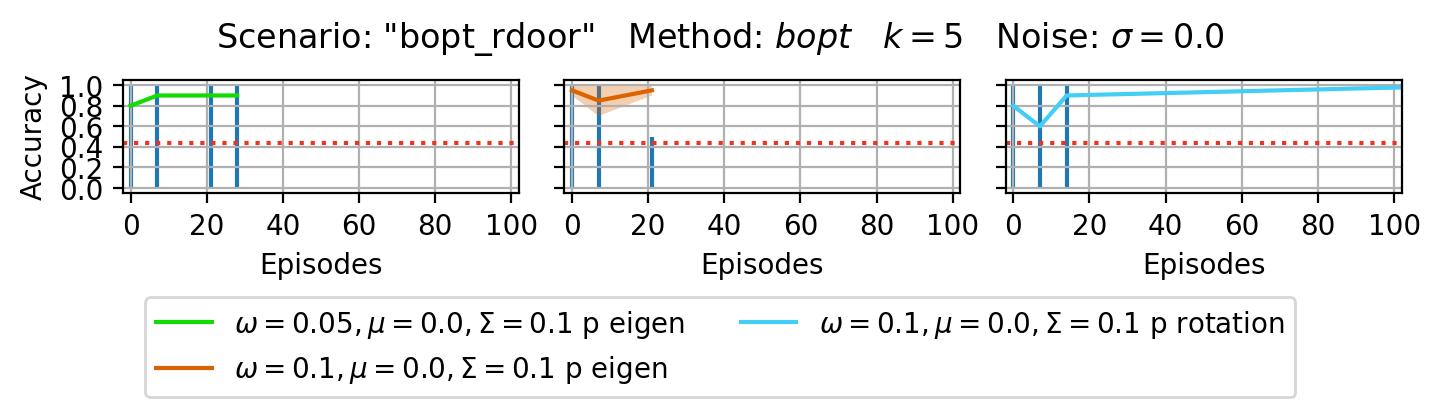

In [103]:
def str_as(a : AccuracyStat):
    return f'$\omega = {a.prior}, \mu = {a.mean}, \Sigma = {a.covar}$ {"".join([m[0] for m in a.means])} {a.cvar_type}'

X_LIM = 100

noise_filter = 0.00

filtered_data = [(str_as(a), a) for a in all_data if a.noise == noise_filter]

components = sorted({a.components for _, a in filtered_data})
data_by_components = {c: [(label, a) for label, a in filtered_data if a.components == c] for c in components}

for c, data in data_by_components.items():
    n_cols = int(math.ceil(len(data) / 3))
    fig, axes = plt.subplots(n_cols, 3, figsize=((6 * 3) / 2.54, (5 * n_cols) / 2.54), layout='constrained', dpi=200)

    legend = {}
    colors = {}

    for x, ((label, ac_stat), ax) in enumerate(zip(sorted(data, key=lambda t: t[0]), axes.flatten())):  # type data: AccuracyStat
        if x % 3 == 0:
            ax.set_yticks(np.linspace(0.0, 1.0, 6))
            ax.set_ylabel('Accuracy')
        else:
            ax.set_yticks(np.linspace(0.0, 1.0, 6), [])

        if label not in colors:
            colors[label] = COLORS.T.flatten()[len(colors)]

        draw_var_plot(ax, ac_stat.data_points, colors[label], label)

        ax.set_xlabel('Episodes')
        ax.set_xticks(np.linspace(0, X_LIM, 6))
        ax.grid(True)
        # if x == 0:
        #     ax.legend(bbox_to_anchor=(0., -.92, 2.2, .102),  loc='lower left',
        #                   ncols=3, mode="expand", borderaxespad=0)
        ax.set_ylim((0 - 0.05, 1.0 + 0.05))
        ax.set_xlim((0 - 2, X_LIM + 2))
        handles, labels = ax.get_legend_handles_labels()
        legend.update(dict(zip(labels, handles)))

        ax.hlines(ac_stat.baseline, *ax.get_xlim(), color='#ee3322', linestyle='dotted')
        
        if ac_stat.baseline_2 is not None:
            ax.hlines(ac_stat.baseline_2, *ax.get_xlim(), color='#0088ee', linestyle='dotted')

        if METHOD_NAME == 'bopt':
            total_inc = max(ac_stat.num_incumbents.values())
            for t, count in ac_stat.num_incumbents.items():
                ax.vlines(t, 0, count / total_inc, zorder=0)
        

    fig.suptitle(f'Scenario: "{OUT_PREFIX}"   Method: ${METHOD_NAME}$   $k = {c}$   Noise: $\sigma = {noise_filter}$')
    fig.legend(legend.values(), legend.keys(), loc='outside lower center', ncols=2)
    fig.savefig(f'plots/{OUT_PREFIX}_p{c}_n{int(noise_filter*100):02d}.png')
# fig.tight_layout()


In [78]:
for dn, ac in zip(data_names, all_data):
    pd.DataFrame(np.vstack([(x, np.mean(d), np.std(d)) for x, d in sorted(ac.data_points.items())]),
                 columns=['x', 'y', 'std']).to_csv(f'data/{METHOD_NAME}_{dn}.csv', index=False)
    print(f'Wrote: data/{METHOD_NAME}_{dn}.csv')

Wrote: data/bopt_og_door_p5_n00_hpo_wp_sR_e0d0a9.csv
Wrote: data/bopt_og_door_p5_n03_hpo_wp_sR_f2dd2b.csv
Wrote: data/bopt_og_door_p5_n01_hpo_wp_sR_1797f5.csv
Wrote: data/bopt_og_door_p5_n02_hpo_wp_sR_504f87.csv


In [30]:
columns = 'k omega mu sigma mu_dim sigma_type noise accuracy episode_count baseline mean_final std_final'.split(' ')

data = []

for a in all_data:  
    a = a # type: AccuracyStat
    last_data = sorted(a.data_points.keys())[-1]
    data.append([a.components, a.prior, a.mean, a.covar, ' '.join(a.means), a.cvar_type, a.noise,
                 np.mean(a.data_points[last_data]), last_data, a.baseline, np.mean(list(a.last_optimization)),
                 np.std(list(a.last_optimization))])

pd.DataFrame(data, columns=columns).to_csv(f'plots/{OUT_PREFIX}_stats.csv', index=False)

In [21]:
config_data_by_headers    = {}
incumbent_data_by_headers = {}

for d in tqdm(list(STAT_DIRECTORY.glob(STAT_PATTERN)), desc='Reading bopt configs...'):
    dhash = d.name.split('_')[-1]

    ac_stat = data_by_hash[dhash]

    try:
        df_config = pd.read_csv(d / 'bopt_configs.csv')
    except pd.errors.EmptyDataError:
        continue
    # Relabel eigen updates based on type
    if ac_stat.cvar_type == 'rotation':
        columns = [c if c[:2] != 'e_' else 'rot_' + c[2:] for c in df_config.columns]
    else:
        columns = df_config.columns

    header_key = ','.join(columns)
    if header_key not in config_data_by_headers:
        config_data_by_headers[header_key] = []
    
    config_data_by_headers[header_key].append(df_config.to_numpy())

    df_config = pd.read_csv(d / 'bopt_incumbents.csv')
    # Relabel eigen updates based on type
    if ac_stat.cvar_type == 'rotation':
        columns = [c if c[:2] != 'e_' else 'rot_' + c[2:] for c in df_config.columns]
    else:
        columns = df_config.columns

    header_key = ','.join(columns)
    if header_key not in incumbent_data_by_headers:
        incumbent_data_by_headers[header_key] = []
    
    incumbent_data_by_headers[header_key].append(df_config.to_numpy())


Reading bopt configs...:   0%|                                                                       | 0/6 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/home/aroefer/icra_sacgmm_exp_rdoor_final/is_rdoor_p3_hpo_we_sR_3_b4deb2/bopt_configs.csv'

In [ ]:
list(config_data_by_headers.keys())

In [ ]:
neutral_values = {'e' : 1.0, 'mean': 0.0, 'weight': 0.0, 'rot': 0.0}

def join_tables(header_data_dict : dict, neutral_values: dict) -> pd.DataFrame:
    joint_header = list(set(sum([k.split(',') for k in header_data_dict.keys()], [])))

    full_data = []

    for c, d in header_data_dict.items():
        c = c.split(',')
        d = np.vstack(d)
        
        new_data = np.ones((d.shape[0], len(joint_header)))

        for x, column in enumerate(joint_header):
            try:
                ox = c.index(column)
                new_data[:, x] = d[:, ox]
            except ValueError:
                prefix = column.split('_')[0]
                new_data[:, x] = neutral_values[prefix]
        
        full_data.append(new_data)
    
    return pd.DataFrame(np.vstack(full_data), columns=joint_header)

join_tables(config_data_by_headers, neutral_values).to_csv(f'data/{OUT_PREFIX}_configs.csv', index=False)
join_tables(incumbent_data_by_headers, neutral_values).to_csv(f'data/{OUT_PREFIX}_incumbents.csv', index=False)

In [ ]:
final_acc_eigen = []
final_acc_rot   = []
final_acc_mean  = []
final_acc_prior = []
final_acc_mean_eigen = []
final_acc_mean_rot   = []

noise_filter = 0.03


for a in all_data: # type: AccuracyStat
    if noise_filter is not None and a.noise != noise_filter:
        continue
    if a.prior != 0.0 and a.mean == 0.0 and a.covar == 0.0:
        final_acc_prior.append(np.mean(a.data_points[max(a.data_points.keys())]))
    elif a.prior != 0.0 and a.mean != 0.0 and a.covar == 0.0:
        final_acc_mean.append(np.mean(a.data_points[max(a.data_points.keys())]))
    elif a.prior != 0.0 and a.mean == 0.0 and a.covar != 0.0 and a.cvar_type == 'eigen':
        final_acc_eigen.append(np.mean(a.data_points[max(a.data_points.keys())]))
    elif a.prior != 0.0 and a.mean == 0.0 and a.covar != 0.0 and a.cvar_type == 'rotation':
        final_acc_rot.append(np.mean(a.data_points[max(a.data_points.keys())]))
    elif a.prior != 0.0 and a.mean != 0.0 and a.covar != 0.0 and a.cvar_type == 'eigen':
        final_acc_mean_eigen.append(np.mean(a.data_points[max(a.data_points.keys())]))
    elif a.prior != 0.0 and a.mean != 0.0 and a.covar != 0.0 and a.cvar_type == 'rotation':
        final_acc_mean_rot.append(np.mean(a.data_points[max(a.data_points.keys())]))

print(f'Mean: {np.mean(final_acc_mean )}')
print(f'Eigen: {np.mean(final_acc_eigen)}')
print(f'Rot: {np.mean(final_acc_rot  )}')
print(f'Mean + Eigen: {np.mean(final_acc_mean_eigen)}')
print(f'Mean + Rot: {np.mean(final_acc_mean_rot  )}')

print()

perf_reached_after_eigen = []
perf_reached_after_rot   = []
perf_reached_after_mean  = []
perf_reached_after_prior = []
perf_reached_after_mean_eigen = []
perf_reached_after_mean_rot   = []
threshold = 0.6

for a in all_data: # type: AccuracyStat
    if noise_filter is not None and a.noise != noise_filter:
        continue

    for s, d in sorted(a.data_points.items()):
        if np.mean(d) >= threshold:
            break
    else:
        s = 500

    if a.prior != 0.0 and a.mean == 0.0 and a.covar == 0.0:
        perf_reached_after_prior.append(s)
    elif a.prior != 0.0 and a.mean != 0.0 and a.covar == 0.0:
        perf_reached_after_mean.append(s)
    elif a.prior != 0.0 and a.mean == 0.0 and a.covar != 0.0 and a.cvar_type == 'eigen':
        perf_reached_after_eigen.append(s)
    elif a.prior != 0.0 and a.mean == 0.0 and a.covar != 0.0 and a.cvar_type == 'rotation':
        perf_reached_after_rot.append(s)
    elif a.prior != 0.0 and a.mean != 0.0 and a.covar != 0.0 and a.cvar_type == 'eigen':
        perf_reached_after_mean_eigen.append(s)
    elif a.prior != 0.0 and a.mean != 0.0 and a.covar != 0.0 and a.cvar_type == 'rotation':
        perf_reached_after_mean_rot.append(s)

print(f'Mean accuracy >= {threshold} after: {np.mean(perf_reached_after_mean )}')
print(f'Eigen accuracy >= {threshold} after: {np.mean(perf_reached_after_eigen)}')
print(f'Rot accuracy >= {threshold} after: {np.mean(perf_reached_after_rot  )}')
print(f'Mean + Eigen accuracy >= {threshold} after: {np.mean(perf_reached_after_mean_eigen)}')
print(f'Mean + Rot accuracy >= {threshold} after: {np.mean(perf_reached_after_mean_rot  )}')
